Segundo Notebook - Aprendizado Supervisionado - Regressão

Importando módulos básicos

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando dados de preços de casas nos EUA:

In [61]:
usa_housing = pd.read_csv("USA_Housing.csv")
usa_housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [62]:
usa_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [63]:
usa_housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [64]:
usa_housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

Fazendo um breve estudo sobre correlação:

<AxesSubplot:>

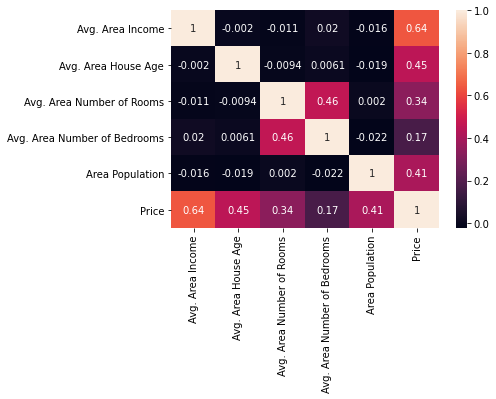

In [65]:
usa_housing = usa_housing.drop(['Address'], axis=1)
sns.heatmap(usa_housing.corr(), annot=True)

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Price'>

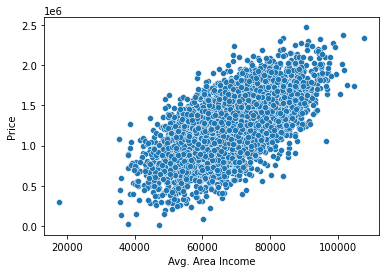

In [66]:
sns.scatterplot(data=usa_housing, x='Avg. Area Income', y='Price')

Criando conjuntos de dados de treinamento e teste. <br>
Dados de endereço são deixados de lado, por não serem numéricos.

In [67]:
from sklearn.model_selection import train_test_split

x_val = usa_housing.drop(['Price'], axis=1).values
y_val = usa_housing['Price']

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=42)

Normalizando os dados e fazendo a regressão:

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# normalização
pipe = Pipeline([('scaler', StandardScaler())])
x_train = pipe.fit_transform(x_train)
x_test = pipe.transform(x_test)

# regressão (treinamento)
my_model = LinearRegression()
my_model.fit(x_train, y_train)
print(my_model.score(x_test, y_test)) # r2 squared

#regressão (teste)
test_pred = my_model.predict(x_test)
train_pred = my_model.predict(x_train)

0.9146818498754016


Algumas funções para avaliação dos resultados:

In [69]:
from sklearn import metrics

def print_evaluate(real, predicted):
    mae = metrics.mean_absolute_error(real, predicted)
    mape = np.mean(np.abs((real - predicted) / real)) #metrics.mean_absolute_percentage_error(real, predicted)
    mse = metrics.mean_squared_error(real, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(real, predicted)
    
    print("MAE:", mae)
    print("MAPE:", mape)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Square:", r2_square)

Impressão dos resultados:

In [70]:
print("Dados de teste:")
print_evaluate(y_test, test_pred)

print("\nDados de treinamento:")
print_evaluate(y_train, train_pred)

Dados de teste:
MAE: 81135.56609336878
MAPE: 0.0733654489628117
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square: 0.9146818498754016

Dados de treinamento:
MAE: 81480.49973174892
MAPE: 0.07734054330070254
MSE: 10287043161.197224
RMSE: 101425.06180031257
R2 Square: 0.9192986579075526


Gráfico: 
Valores reais x valores previstos

<AxesSubplot:xlabel='Price'>

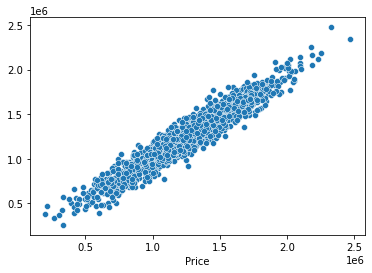

In [71]:
sns.scatterplot(x=y_test, y=test_pred)

In [72]:
print(my_model.intercept_, my_model.coef_, my_model.score(x_test, y_test))

1228219.1492415695 [232679.72464304 163841.04659288 121110.55547764   2892.81511895
 151252.34237708] 0.9146818498754016


Isso seria o mesmo que dizer que a equação obtida pela regressão é aproximadamente:

y = 1228219 + 232679 * x1 + 163841 * x2 + 121110 * x3 + 2892 * x4 + 151252 * x5

E que o valor do coeficiente de determinação (R²) do modelo é 91.46, o que significa que 91,46% da variação da variável resposta (dependente) pode ser explicada pelas cinco variáveis preditoras do modelo (independentes). Quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra (varia entre 0 e 1).